In [2]:
#IMPORTS 

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [3]:
#FUNCTION FOR IMAGE PROCESSING / TAKE GRADIENT OF IMAGE, RESIZE, AND FLATTEN
def process_image(image_path):
    # Read the image in grayscale and resize it to 128x128
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))

    # Calculate the gradient of the image
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude.flatten().astype(np.float16)

In [4]:
#FUNCTION TO LOAD TRAINING DATA
def load_train_data(train_folder):
    x_train = []
    y_train = []

    # Iterate through the train folder and load the images
    for subdir, _, files in os.walk(train_folder):
        for file in files:
            label = subdir.split(os.sep)[-1]
            image_path = os.path.join(subdir, file)
            vector = process_image(image_path)

            x_train.append(vector)
            if label == 'cellphone':
                y_train.append(1)
            elif label == 'flamingo':
                y_train.append(2)
            elif label == 'Motorbikes':
                y_train.append(3)

    return np.array(x_train), np.array(y_train)


In [5]:
#STEP 2: KNN ALGORITHM IMPLEMENTATION
def KNN(x_train, y_train, sample_test, k=5):
    distance = np.zeros(len(sample_test))
    distances = np.zeros(len(x_train))
    # Calculate the euclidean distance between the sample test vector and all the training vectors
    for i in range(len(x_train)):
        for j in range(len(sample_test)):
            distance[i] += (x_train[i][j] - sample_test[j])**2
        distances[i] = np.sqrt(distance[i])


    # Sort the distances and get the indices of the sorted array
    indices = np.argsort(distances)

    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train[indices[:k]]

    # Get the unique labels and their counts
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)

    # Get the label which has the maximum count
    predicted_class = unique_labels[np.argmax(counts)]

    return predicted_class

In [6]:
# Call the function to load the training data
x_train, y_train = load_train_data('CaltechTinySplit/train')

# # Load and process the test image (similar to processing the training images)
# sample_test_vector = process_image('CaltechTinySplit/test/Motorbikes/image_0013.jpg')

# # Call the KNN function to classify the test image
# predicted_class = KNN(x_train, y_train, sample_test_vector, k=5)
# print(f"The predicted class for the sample test is: {predicted_class}")
# display_image('CaltechTinySplit/test/Motorbikes/image_0013.jpg')

In [7]:
# DISPLAY IMAGE FUNCTION
def displayImg(img):
    plotImg = plt.imshow(img)
    plt.show()

In [8]:
predicted_class_library = {1: 'cellphone', 2: 'flamingo', 3: 'Motorbikes'}

***************************RESULTS FOR FLAMINGO IMAGES***************************
*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******
The predicted class for the image1 is: flamingo
The predicted class for the image2 is: flamingo
The predicted class for the image3 is: flamingo
*******FLAMINGO TEST IMAGES******


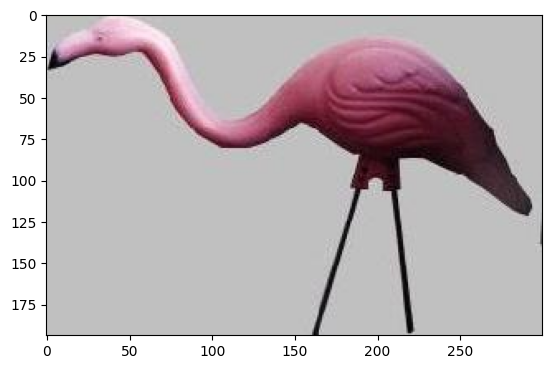

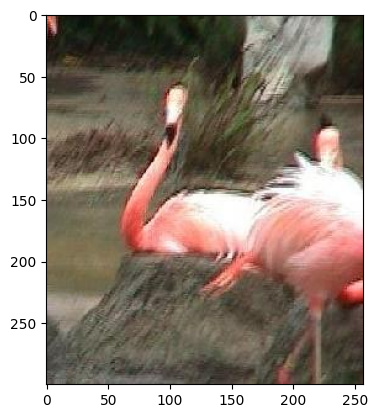

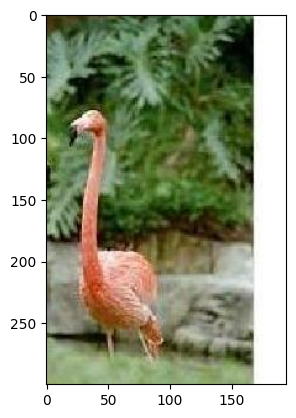

In [9]:
print("***************************RESULTS FOR FLAMINGO IMAGES***************************")

# Load and process the test image (similar to processing the training images)
sample_test_vector_1 = process_image('CaltechTinySplit/test/flamingo/image_0022.jpg')
sample_test_vector_2=process_image("CaltechTinySplit/test/flamingo/image_0024.jpg")
sample_test_vector_3=process_image('CaltechTinySplit/test/flamingo/image_0041.jpg')

# Call the KNN function to classify the test image
predicted_class_1 = KNN(x_train, y_train, sample_test_vector_1, k=5)
predicted_class_2 = KNN(x_train, y_train, sample_test_vector_2, k=5)
predicted_class_3 = KNN(x_train, y_train, sample_test_vector_3, k=5)

print("*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******")
print(f"The predicted class for the image1 is: {predicted_class_library[predicted_class_1]}")
print(f"The predicted class for the image2 is: {predicted_class_library[predicted_class_2]}")
print(f"The predicted class for the image3 is: {predicted_class_library[predicted_class_3]}")

print("*******FLAMINGO TEST IMAGES******")
I1=plt.imread('CaltechTinySplit/test/flamingo/image_0022.jpg')
displayImg(I1)
I2=plt.imread('CaltechTinySplit/test/flamingo/image_0024.jpg')
displayImg(I2)
I3=plt.imread('CaltechTinySplit/test/flamingo/image_0041.jpg')
displayImg(I3)

***************************RESULTS FOR MOTORBIKE IMAGES***************************
*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******
The predicted class for the image1 is: Motorbikes
The predicted class for the image2 is: Motorbikes
The predicted class for the image3 is: Motorbikes
*******MOTORBIKE TEST IMAGES******


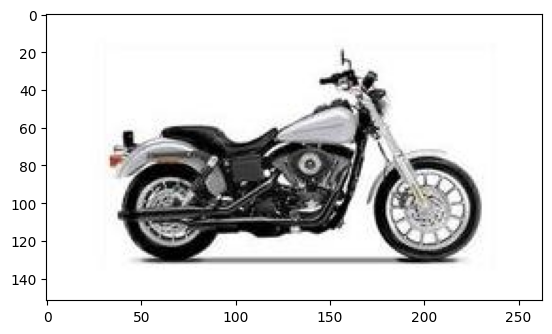

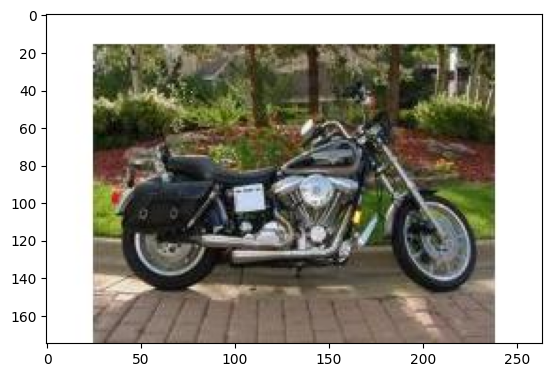

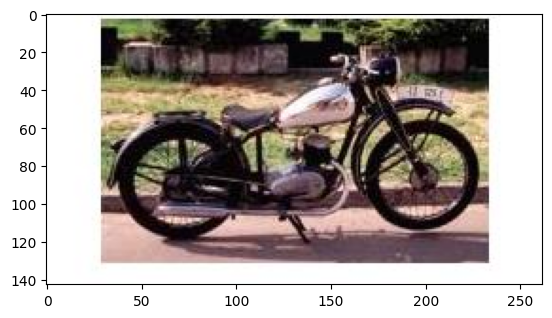

In [10]:
print("***************************RESULTS FOR MOTORBIKE IMAGES***************************")

# Load and process the test image (similar to processing the training images)
sample_test_vector_1 = process_image("CaltechTinySplit/test/Motorbikes/image_0013.jpg")
sample_test_vector_2=process_image("CaltechTinySplit/test/Motorbikes/image_0170.jpg")
sample_test_vector_3=process_image('CaltechTinySplit/test/Motorbikes/image_0112.jpg')

# Call the KNN function to classify the test image
predicted_class_1 = KNN(x_train, y_train, sample_test_vector_1, k=5)
predicted_class_2 = KNN(x_train, y_train, sample_test_vector_2, k=5)
predicted_class_3 = KNN(x_train, y_train, sample_test_vector_3, k=5)

print("*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******")
print(f"The predicted class for the image1 is: {predicted_class_library[predicted_class_1]}")
print(f"The predicted class for the image2 is: {predicted_class_library[predicted_class_2]}")
print(f"The predicted class for the image3 is: {predicted_class_library[predicted_class_3]}")

print("*******MOTORBIKE TEST IMAGES******")
I1=plt.imread('CaltechTinySplit/test/Motorbikes/image_0013.jpg')
displayImg(I1)
I2=plt.imread('CaltechTinySplit/test/Motorbikes/image_0170.jpg')
displayImg(I2)
I3=plt.imread('CaltechTinySplit/test/Motorbikes/image_0112.jpg')
displayImg(I3)

***************************RESULTS FOR CELLPHONE IMAGES***************************
*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******
The predicted class for the image1 is: cellphone
The predicted class for the image2 is: cellphone
The predicted class for the image3 is: cellphone
*******MOTORBIKE TEST IMAGES******


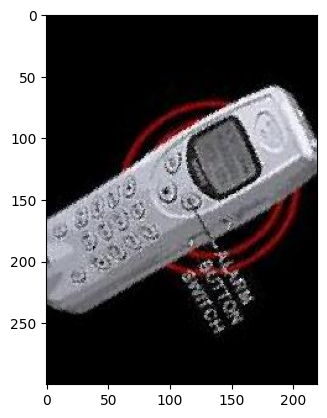

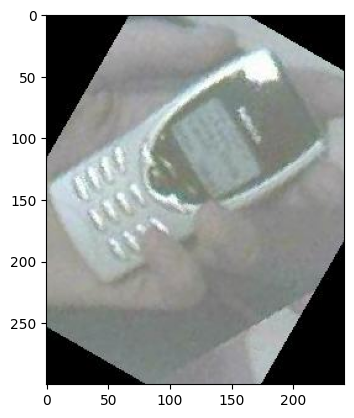

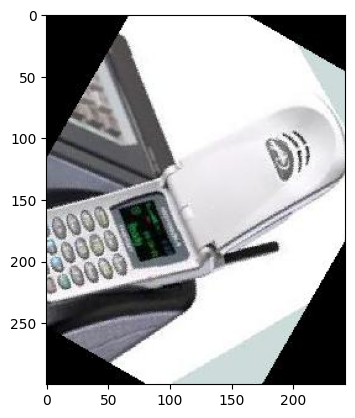

In [11]:
print("***************************RESULTS FOR CELLPHONE IMAGES***************************")

# Load and process the test image (similar to processing the training images)
sample_test_vector_1 = process_image("CaltechTinySplit/test/cellphone/image_0038.jpg")
sample_test_vector_2=process_image("CaltechTinySplit/test/cellphone/image_0040.jpg")
sample_test_vector_3=process_image('CaltechTinySplit/test/cellphone/image_0046.jpg')

# Call the KNN function to classify the test image
predicted_class_1 = KNN(x_train, y_train, sample_test_vector_1, k=5)
predicted_class_2 = KNN(x_train, y_train, sample_test_vector_2, k=5)
predicted_class_3 = KNN(x_train, y_train, sample_test_vector_3, k=5)

print("*******PREDICTED RESULTS AFTER THE KNN ALGORITHM******")
print(f"The predicted class for the image1 is: {predicted_class_library[predicted_class_1]}")
print(f"The predicted class for the image2 is: {predicted_class_library[predicted_class_2]}")
print(f"The predicted class for the image3 is: {predicted_class_library[predicted_class_3]}")

print("*******MOTORBIKE TEST IMAGES******")
I1=plt.imread('CaltechTinySplit/test/cellphone/image_0024.jpg')
displayImg(I1)
I2=plt.imread('CaltechTinySplit/test/cellphone/image_0037.jpg')
displayImg(I2)
I3=plt.imread('CaltechTinySplit/test/cellphone/image_0046.jpg')
displayImg(I3)